In [1]:
# LOAD FILE
import json
file = "./allJobs.json"
f = open(file, "r")
data = json.load(f)

In [2]:
# CONVERT TO DATAFRAMES
import pandas as pd
df = pd.json_normalize(data)


In [3]:
#lowercase
df["description_1"] = df.description.str.lower()
#remove \n
df["description_2"] = df.description_1.str.replace("\\n", " ")

In [4]:
def queryCertifications(*jobCategory):
    queries = ["information technology degree", "degree in information technology", "computer science degree", "degree in computer science", "diploma", "mcsa", "mcsd", "mcse", "ccna", "ccnp", "ccie", "security\+", "a\+", "network\+", "itil cert", "ceh", "cisa", "cism", "cissp", "aws cert", "azure cert", "ccdh", "ocp", "ocm", "csd", "pmi"]
    results = []

    if len(jobCategory):
        filteredJobs = df.query('classification == "'+ jobCategory[0] +'"')
        for query in queries:
            results.append(len(filteredJobs.query('description_2.str.contains("' + query + '", regex=False)', engine='python')))
    else:
        for query in queries:
            results.append(len(df.query('description_2.str.contains("' + query + '", regex=False)', engine='python')))
    
    return {
        'queries': queries,
        'results': results
    }




In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plotJobs(title, queries, results):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    wedges, texts = ax.pie(results, wedgeprops=dict(width=0.5), startangle=-40)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(queries[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.8*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title)

    plt.gcf()
    fig.set_size_inches(8,6)
    plt.show()


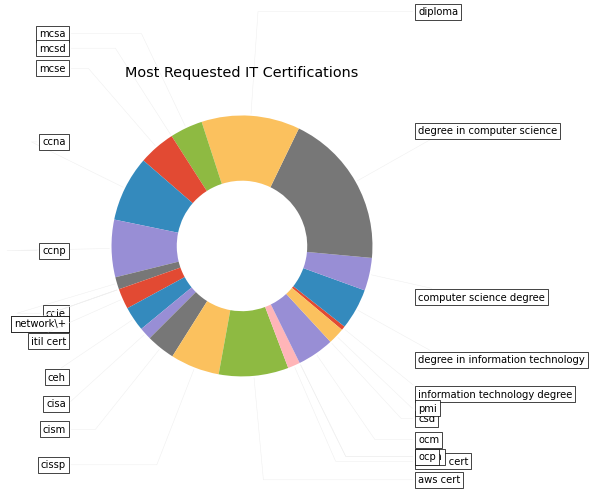

In [6]:
allJobs = queryCertifications()
plotJobs("Most Requested IT Certifications", allJobs['queries'], allJobs['results'])

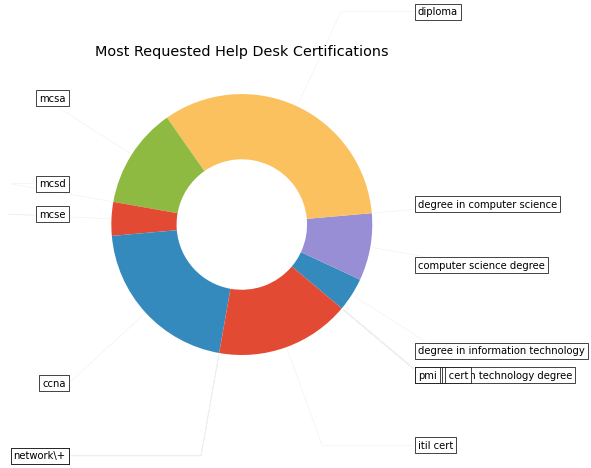

In [7]:
hdJobs = queryCertifications("Information & Communication Technology, Help Desk & IT Support")
plotJobs("Most Requested Help Desk Certifications", hdJobs['queries'], hdJobs['results'])


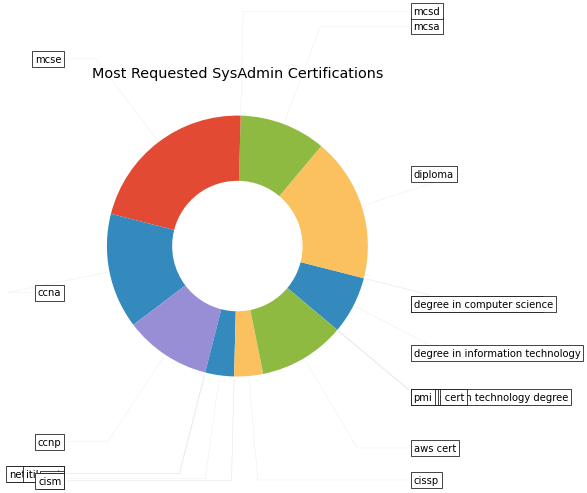

In [8]:
saJobs = queryCertifications("Information & Communication Technology, Networks & Systems Administration")
plotJobs("Most Requested SysAdmin Certifications", saJobs['queries'], saJobs['results'])

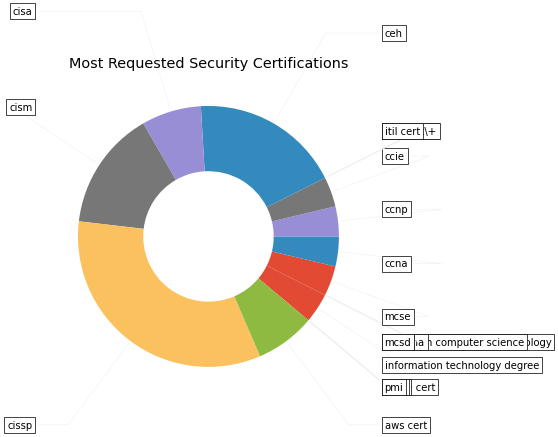

In [9]:
secJobs = queryCertifications("Information & Communication Technology, Security")
plotJobs("Most Requested Security Certifications", secJobs['queries'], secJobs['results'])

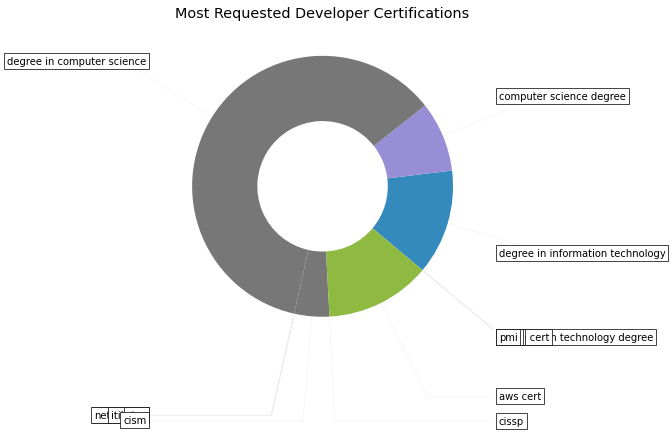

In [10]:
devJobs = queryCertifications("Information & Communication Technology, Developers/Programmers")
plotJobs("Most Requested Developer Certifications", devJobs['queries'], devJobs['results'])